[array([1402, 1612, 1672, 1753, 1912, 2163, 2101, 2194, 2426, 2337, 2378,
       2242, 2456, 2643, 2518, 2376, 2596, 2750, 2683, 3289, 4248, 4483,
       5160, 5796, 6506, 6970, 7422, 7421, 7687, 7247, 6269, 6140, 5891,
       5481, 5332, 5298, 4959, 5413, 5653, 5547, 5438, 5268, 4397, 5018,
       4753, 4964, 5306, 5561, 5708, 6069, 5861, 5766, 5842, 5539, 5114,
       5360, 5168, 4975, 5367, 5549, 5659, 5241, 4941, 4817, 4264, 4541,
       3715, 3249, 3645, 2388, 2656, 2546, 2765, 2702, 2183, 1869, 1940,
       1894, 2134, 1739, 1459, 1434, 1255, 1066,  891,  835,  636,  494,
        441,  339,  281,  259,  184,  169,   97,   83,   68,   53,   46,
         37,  218]), '광진구 ']


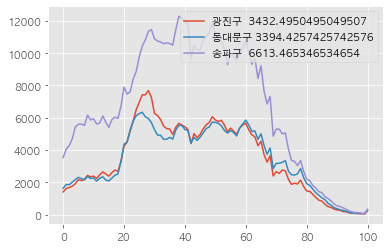

In [31]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

# csv -> data
f = open('/Users/chungyeons/Downloads/population.csv', 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)
header = next(data)

# remove comma
def remove_comma(x):
    return x.replace(',', '')

# data -> 2d array
arr = []
for row in data:
    
    x = []
    for j in row:
        j = remove_comma(j)
        x.append(j)
    arr.append(x)
    
# 2d array -> np.array
npArr = np.array(arr)

# standard 추출
def convert(string):
    for i in (npArr):
        if string in i[0]:
            place = i[0][6:10]
            set = [i[3:].astype(np.int64), place]
            
    return set

standard = convert("광진구")

print(standard)

# calculation
calc_list = []
for i in npArr:
    calcArr = (standard[0] - i[3:].astype(np.int64))**2
    calcNum = 0
    
    for j in calcArr:
        calcNum += j
        
    calc_list.append([i[0], calcNum])

calc_list.sort(key=lambda x:x[1])

max = convert(calc_list[1][0])
min = convert(calc_list[-1][0])

x = [1 * i for i in range(0,101)]

standard[1] = standard[1] + " " + str(np.mean(standard[0]))
max[1] = max[1] + " " + str(np.mean(max[0]))
min[1] = min[1] + " " + str(np.mean(min[0]))


plt.rc('font', family='AppleGothic')
plt.style.use('ggplot')

plt.plot(x, standard[0], label = standard[1])
plt.plot(x, max[0], label = max[1])
plt.plot(x, min[0], label = min[1])
plt.legend()

plt.show()

